Now that you have been equipped with the skills to use different Machine Learning algorithms, over the course of five weeks, you will have the opportunity to practice and apply it on a dataset. In this project, you will complete a notebook where you will build a classifier to predict whether a loan case will be paid off or not. 

You load a historical dataset from previous loan applications, clean the data, and apply different classification algorithm on the data. You are expected to use the following algorithms to build your models:



* k-Nearest Neighbour
* Decision Tree
* Support Vector Machine
* Logistic Regression

The results is reported as the accuracy of each classifier, using the following metrics when these are applicable:

* Jaccard index
* F1-score
* LogLoass

# 0. Data preparation

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

In [39]:
loan_train = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv')
loan_train.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [40]:
loan_train.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender'],
      dtype='object')

In [41]:
loan_train= loan_train[['loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender']]

In [42]:
loan_train.columns

Index(['loan_status', 'Principal', 'terms', 'effective_date', 'due_date',
       'age', 'education', 'Gender'],
      dtype='object')

In [43]:
loan_test = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv')
loan_test.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [44]:
loan_test= loan_test[['loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender']]

### visualization_analysis


In [45]:
loan_train['due_date'] = pd.to_datetime(loan_train['due_date'])
loan_train['effective_date'] = pd.to_datetime(loan_train['effective_date'])

loan_train['Length'] = loan_train['due_date']  - loan_train['effective_date'] 
loan_train['Length'][0:5]

0   29 days
1   29 days
2   14 days
3   29 days
4   29 days
Name: Length, dtype: timedelta64[ns]

In [122]:
loan_test['due_date'] = pd.to_datetime(loan_test['due_date'])
loan_test['effective_date'] = pd.to_datetime(loan_test['effective_date'])

loan_test['Length'] = loan_test['due_date']  - loan_test['effective_date'] 
loan_test['Length'][0:5]

0   29 days
1    6 days
2   29 days
3   29 days
4   14 days
Name: Length, dtype: timedelta64[ns]

In [46]:
loan_train.shape

(346, 9)

In [123]:
loan_test.shape

(54, 11)

In [47]:
loan_train['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

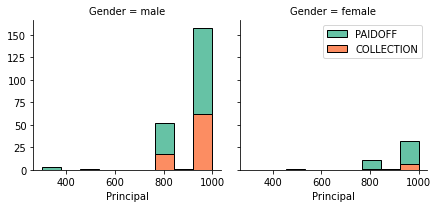

In [48]:
import seaborn as sns

bins = np.linspace(loan_train.Principal.min(), loan_train.Principal.max(), 10)
g = sns.FacetGrid(loan_train, col="Gender", hue="loan_status", palette="Set2", col_wrap=3)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

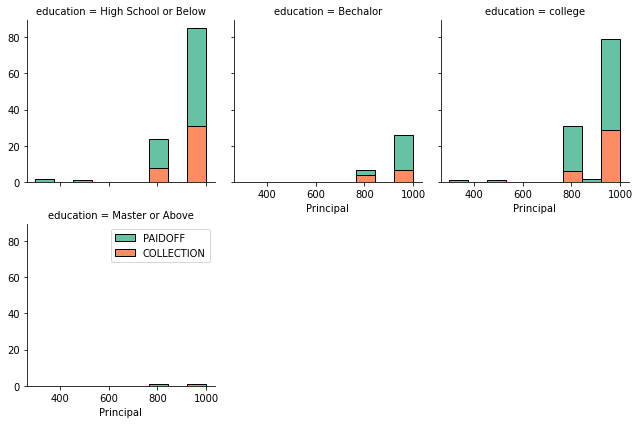

In [49]:
import seaborn as sns

bins = np.linspace(loan_train.Principal.min(), loan_train.Principal.max(), 10)
g = sns.FacetGrid(loan_train, col="education", hue="loan_status", palette="Set2", col_wrap=3)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

### Pre-processing

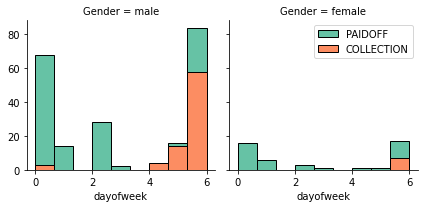

In [51]:
loan_train['dayofweek'] = loan_train['effective_date'].dt.dayofweek
bins=np.linspace(loan_train.dayofweek.min(), loan_train.dayofweek.max(), 10)
g = sns.FacetGrid(loan_train, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


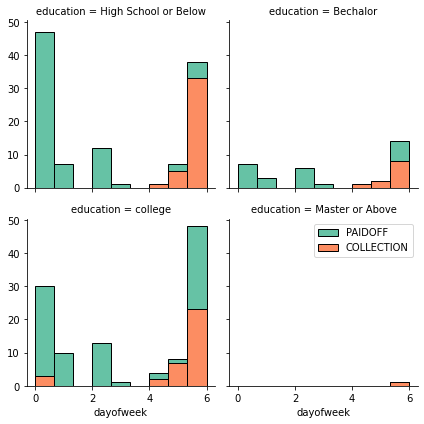

In [52]:
loan_train['dayofweek'] = loan_train['effective_date'].dt.dayofweek
bins=np.linspace(loan_train.dayofweek.min(), loan_train.dayofweek.max(), 10)
g = sns.FacetGrid(loan_train, col="education", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


In [53]:
loan_train['weekend']= loan_train['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
loan_train.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,Length,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,29 days,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,29 days,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,14 days,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,29 days,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,29 days,4,1


In [124]:
loan_test['weekend']= loan_test['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
loan_test.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,Length
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0,29 days
1,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1,6 days
2,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1,29 days
3,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1,29 days
4,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1,14 days


In [55]:
loan_train.groupby(['Gender','education'])['loan_status'].value_counts(normalize=True)

Gender  education             loan_status
female  Bechalor              PAIDOFF        1.000000
        High School or Below  PAIDOFF        0.800000
                              COLLECTION     0.200000
        college               PAIDOFF        0.863636
                              COLLECTION     0.136364
male    Bechalor              PAIDOFF        0.676471
                              COLLECTION     0.323529
        High School or Below  PAIDOFF        0.732824
                              COLLECTION     0.267176
        Master or Above       COLLECTION     0.500000
                              PAIDOFF        0.500000
        college               PAIDOFF        0.748031
                              COLLECTION     0.251969
Name: loan_status, dtype: float64

In [125]:
loan_test.groupby(['Gender','education'])['loan_status'].value_counts(normalize=True)

Gender  education             loan_status
0       Bechalor              PAIDOFF        1.000000
        High School or Below  PAIDOFF        0.533333
                              COLLECTION     0.466667
        Master or Above       PAIDOFF        1.000000
        college               PAIDOFF        0.800000
                              COLLECTION     0.200000
1       Bechalor              PAIDOFF        1.000000
        High School or Below  COLLECTION     0.500000
                              PAIDOFF        0.500000
        college               PAIDOFF        1.000000
Name: loan_status, dtype: float64

In [56]:
loan_train['education'].replace(to_replace=['Bechalor', 'High School or Below', 'Master or Above', 'college'],
                        value=[0,1,2,3],inplace=True)

In [126]:
loan_test['education'].replace(to_replace=['Bechalor', 'High School or Below', 'Master or Above', 'college'],
                        value=[0,1,2,3],inplace=True)

In [57]:
loan_train['Gender'].replace(to_replace=['male', 'female'],
                        value=[0,1],inplace=True)

In [127]:
loan_test['Gender'].replace(to_replace=['male', 'female'],
                        value=[0,1],inplace=True)

In [58]:
X =loan_train[['Principal', 'terms','age','Gender','weekend']].values
X[0:5]

array([[1000,   30,   45,    0,    0],
       [1000,   30,   33,    1,    0],
       [1000,   15,   27,    0,    0],
       [1000,   30,   28,    1,    1],
       [1000,   30,   29,    0,    1]], dtype=int64)

In [128]:
test_X =loan_test[['Principal', 'terms','age','Gender','weekend']].values
test_X[0:5]

array([[1000,   30,   50,    1,    0],
       [ 300,    7,   35,    0,    1],
       [1000,   30,   43,    1,    1],
       [1000,   30,   26,    0,    1],
       [ 800,   15,   29,    0,    1]], dtype=int64)

In [59]:
y=loan_train['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [129]:
#Normalize data
test_X = preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_X[0:5]

array([[ 0.49,  0.93,  3.06,  1.98, -1.3 ],
       [-3.56, -1.7 ,  0.53, -0.51,  0.77],
       [ 0.49,  0.93,  1.88,  1.98,  0.77],
       [ 0.49,  0.93, -0.98, -0.51,  0.77],
       [-0.67, -0.79, -0.48, -0.51,  0.77]])

In [130]:
test_y=loan_test['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

# 1. k-Nearest Neighbour

### 1-1.Train Test Split

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 5) (276,)
Test set: (70, 5) (70,)


### 1-2. Classification - K nearest neighbor (KNN)

In [62]:
from sklearn.neighbors import KNeighborsClassifier

#### Training k =4

In [63]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

#### Predicting

In [64]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

#### What about other K?

In [66]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.64285714, 0.64285714, 0.75714286, 0.68571429, 0.75714286,
       0.64285714, 0.68571429, 0.65714286, 0.72857143])

#### Plot the model accuracy for a different number of neighbors.

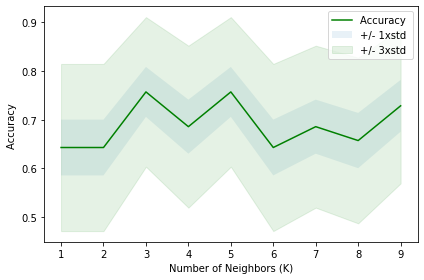

In [67]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [137]:
#### Accuracy evaluation using Jaccard score funtion.
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7717391304347826
Test set Accuracy:  0.6857142857142857


In [151]:
# For test data
knn_yhat = neigh.predict(test_X)

In [154]:
from sklearn import metrics
print("KNN Jaccard index: %.2f" % metrics.accuracy_score(test_y, knn_yhat))
print("KNN F1-score: %.2f" % metrics.accuracy_score(test_y, knn_yhat) )

KNN Jaccard index: 0.74
KNN F1-score: 0.74


# 2. Decision Tree

In [68]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

### 2-1 Modeling

In [71]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree # it shows the default parameters
Tree.fit(X_train,y_train)
Tree


DecisionTreeClassifier(criterion='entropy', max_depth=4)

### 2-2 Prediction

In [74]:
predTree = Tree.predict(X_test)

In [97]:
print (predTree [0:5])
print (y_testset [0:5])

['PAIDOFF' 'PAIDOFF' 'COLLECTION' 'COLLECTION' 'PAIDOFF']
[['PAIDOFF']
 ['PAIDOFF']
 ['COLLECTION']
 ['COLLECTION']
 ['PAIDOFF']]


### 2-3 Evaluation

In [76]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.6142857142857143


In [155]:
#For test data
Tree_yhat = Tree.predict(test_X)

In [156]:
from sklearn import metrics
print("Tree Jaccard index: %.2f" % metrics.accuracy_score(test_y, Tree_yhat))
print("Tree F1-score: %.2f" % metrics.accuracy_score(test_y, Tree_yhat) )

Tree Jaccard index: 0.72
Tree F1-score: 0.72


### 2-4 Visualization

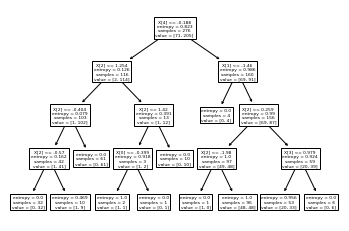

In [77]:
tree.plot_tree(Tree)
plt.show()

# 3. Support Vector Machine

### 3-1 Modeling

In [84]:
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train)

SVC()

In [85]:
#Prediction
yhat = SVM_model.predict(X_test)
yhat

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'COLLECTION',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

### 3-2 Evaluation

In [86]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [87]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [88]:

print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

  COLLECTION       0.18      0.13      0.15        15
     PAIDOFF       0.78      0.84      0.81        55

    accuracy                           0.69        70
   macro avg       0.48      0.48      0.48        70
weighted avg       0.65      0.69      0.67        70



              precision    recall  f1-score   support

  COLLECTION       0.18      0.13      0.15        15
     PAIDOFF       0.78      0.84      0.81        55

    accuracy                           0.69        70
   macro avg       0.48      0.48      0.48        70
weighted avg       0.65      0.69      0.67        70

Confusion matrix, without normalization
[[ 2 13]
 [ 9 46]]


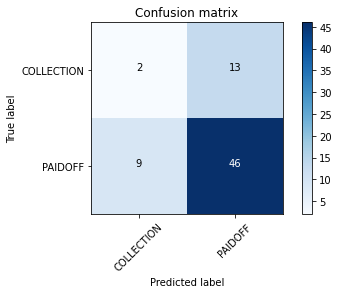

In [91]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=['COLLECTION','PAIDOFF'])
np.set_printoptions(precision=1)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['COLLECTION','PAIDOFF'],normalize= False,  title='Confusion matrix')

In [92]:
#f1 score
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.6670522459996144

In [94]:
#the jaccard index
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label='COLLECTION')

0.08333333333333333

In [157]:
# For test data
SVM_yhat = SVM_model.predict(test_X)


In [158]:
from sklearn import metrics
print("SVM Jaccard index: %.2f" % metrics.accuracy_score(test_y, SVM_yhat))
print("SVM F1-score: %.2f" % metrics.accuracy_score(test_y, SVM_yhat) )

SVM Jaccard index: 0.74
SVM F1-score: 0.74


# 4. Logistic Regression

### 4-1 Modeling (Logistic Regression with Scikit-learn)

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [96]:
yhat = LR.predict(X_test)
yhat

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'COLLECTION',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [97]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[1:10]

array([[0.5, 0.5],
       [0.3, 0.7],
       [0.3, 0.7],
       [0.3, 0.7],
       [0.3, 0.7],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.3, 0.7],
       [0.5, 0.5]])

### 4-2 Evaluation

In [100]:
#jaccard index
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label='COLLECTION')

0.08333333333333333

Confusion matrix, without normalization
[[46  9]
 [13  2]]


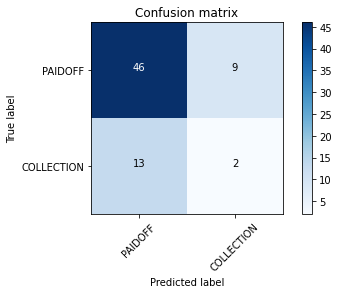

In [101]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')

In [102]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

  COLLECTION       0.18      0.13      0.15        15
     PAIDOFF       0.78      0.84      0.81        55

    accuracy                           0.69        70
   macro avg       0.48      0.48      0.48        70
weighted avg       0.65      0.69      0.67        70



In [103]:
#log loss
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5772816209870317

In [160]:
#For test data
LR_yhat = LR.predict(test_X)

In [161]:
from sklearn import metrics
print("LR Jaccard index: %.2f" % metrics.accuracy_score(test_y, LR_yhat))
print("LR F1-score: %.2f" % metrics.accuracy_score(test_y, LR_yhat) )

LR Jaccard index: 0.74
LR F1-score: 0.74
